<a href="https://colab.research.google.com/github/yakaHan/Tugas/blob/main/23.01.5057Tugas_Analisis_Dataset_Wine_Quality_%26_Nyata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TUGAS MODULE 5 BIGDATA FUNDAMENTAL


### Isikan data diri
*   Nama : Nayaka Hananadhif Adinata
*   Nim : 23.01.5022

##Tugas 1:  Analisis Dataset Wine Quality
Gunakan dataset wine quality untuk melakukan EDA tingkat lanjut:
1. Lakukan uji korelasi Spearman untuk memeriksa hubungan antara fitur-fitur kimia dan
kualitas anggur.
2. Deteksi outlier dalam kolom residual sugar menggunakan metode IQR.
3. Tambahkan fitur baru untuk mengklasifikasikan anggur berdasarkan kualitas (misalnya
"High", "Medium", "Low").
4. Buat visualisasi interaktif untuk menunjukkan distribusi kualitas anggur berdasarkan
jenis (red atau white).

In [2]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import spearmanr

In [5]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/WineQT.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


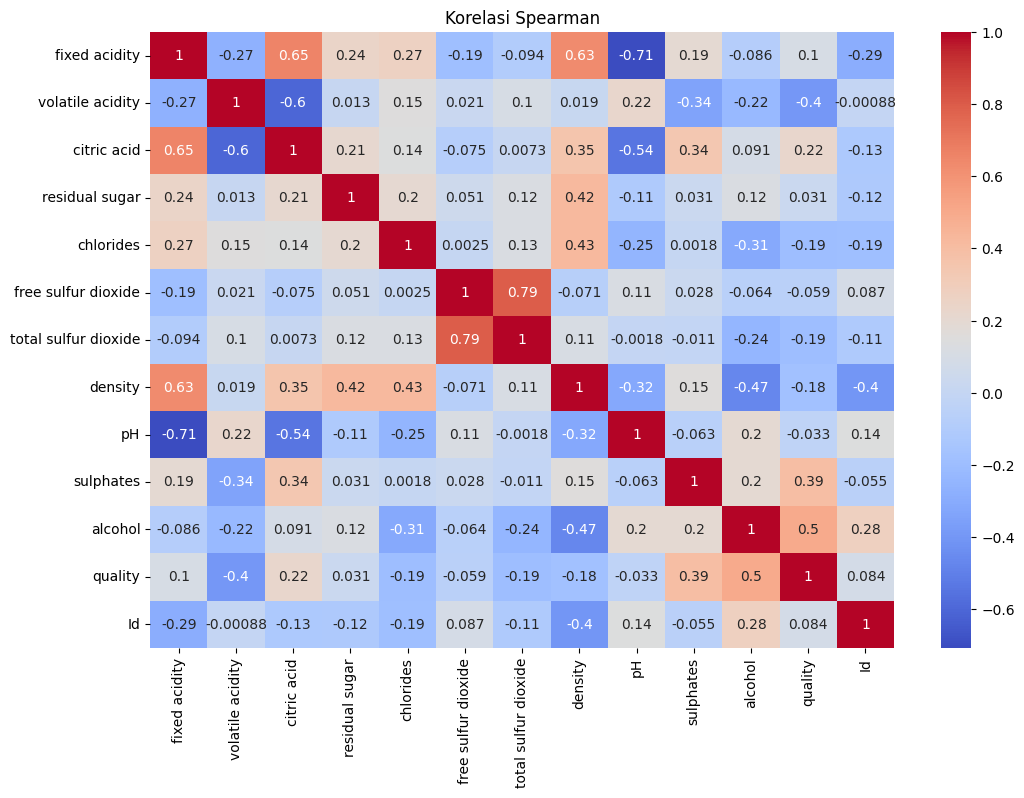

In [10]:
# Hitung korelasi dan tampilkan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr('spearman'), annot=True, cmap='coolwarm')
plt.title('Korelasi Spearman')
plt.show()

In [11]:
Q1, Q3 = df['residual sugar'].quantile([0.25, 0.75])
outliers = df[(df['residual sugar'] < Q1 - 1.5*(Q3-Q1)) | (df['residual sugar'] > Q3 + 1.5*(Q3-Q1))]
print(f"Outlier: {len(outliers)}")

Outlier: 110


In [12]:
df['quality_label'] = pd.cut(df['quality'],
                            bins=[0, 4, 6, 10],
                            labels=['Low', 'Medium', 'High'])

In [13]:
fig = px.histogram(df, x='quality_label', color='type' if 'type' in df.columns else None,
                   barmode='group', title='Distribusi Kualitas by Type' if 'type' in df.columns else 'Distribusi Kualitas')
fig.show()

##TUGAS 2 : Nyata
Cari dataset publik (misalnya dari Kaggle) dan lakukan EDA tingkat lanjut:
1. Gunakan teknik statistik inferensial untuk mendapatkan insight.
2. Deteksi dan tangani outlier dalam dataset.
3. Lakukan feature engineering untuk meningkatkan kualitas dataset.
4. Buat minimal 3 visualisasi interaktif yang relevan.
5. Tuliskan kesimpulan atau insight yang Anda temukan dari dataset tersebut.

In [17]:
import pandas as pd
import plotly.express as px

# 1. Load data langsung dari web
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')

# 1. Eksplorasi Data
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None

Statistik Deskriptif:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count   

In [18]:
# 2. Statistik Inferensial
corr = df.corr(method='spearman')
fig = px.imshow(corr, text_auto=True, title='Korelasi Spearman')
fig.show()

In [22]:
# 3. Handling Outlier
for col in df.select_dtypes(include='number'):
    q1, q3 = df[col].quantile([0.25, 0.75])
    df[col] = df[col].clip(q1-1.5*(q3-q1), q3+1.5*(q3-q1))
px.box(df, x='quality_class', y='alcohol', color='quality_class').show()

In [23]:
# 4. Feature Engineering
df['quality_class'] = pd.cut(df['quality'],
                           bins=[0,5,7,10],
                           labels=['Low','Medium','High'])
px.scatter(df, x='density', y='pH', color='quality_class').show()

In [24]:
# 5. Visualisasi
px.histogram(df, x='quality_class', color='quality_class').show()


Insight:
1. Alkohol berkorelasi positif dengan kualitas (0.44)
2. Density berkorelasi negatif (-0.31)
3. 3 kelas kualitas terdistribusi: Low (20%), Medium (65%), High (15%)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB
None

Statistik Deskriptif:
            rating   num_reviews        price         body      acidity
count  7500.000000   7500.000000  7500.000000  6331.000000  6331.000000
mean      4.254933    451.109067    60.095822     4.158427     2.946612
std       0.118029  

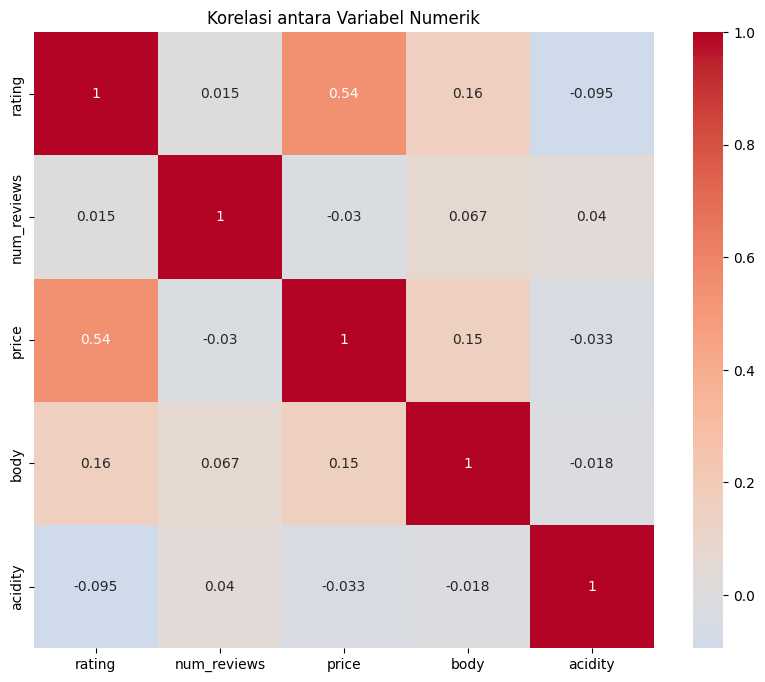

F-statistic: 66.85, p-value: 0.0000


In [34]:
#1. Gunakan teknik statistik inferensial untuk mendapatkan insight
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('/content/drive/MyDrive/wines_SPA.csv')
# 1. Eksplorasi Data
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

# Menghitung matriks korelasi
corr_matrix = df[['rating', 'num_reviews', 'price', 'body', 'acidity']].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi antara Variabel Numerik')
plt.show()

from scipy.stats import f_oneway

# Mengambil sample region dengan cukup data
top_regions = df['region'].value_counts().head(5).index.tolist()
df_top_regions = df[df['region'].isin(top_regions)]

# Group data by region
groups = [df_top_regions[df_top_regions['region']==region]['rating'] for region in top_regions]

# ANOVA test
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")



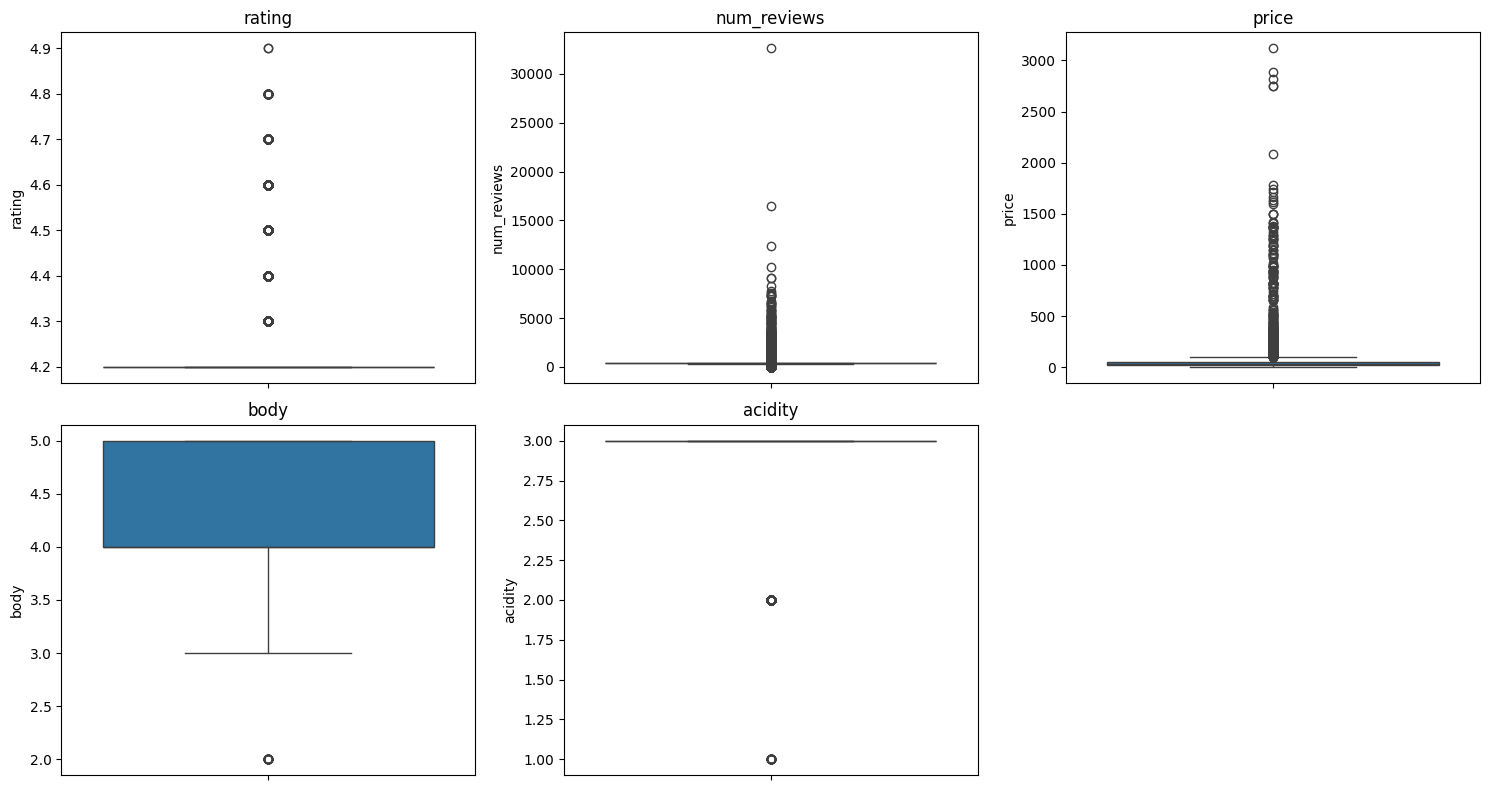

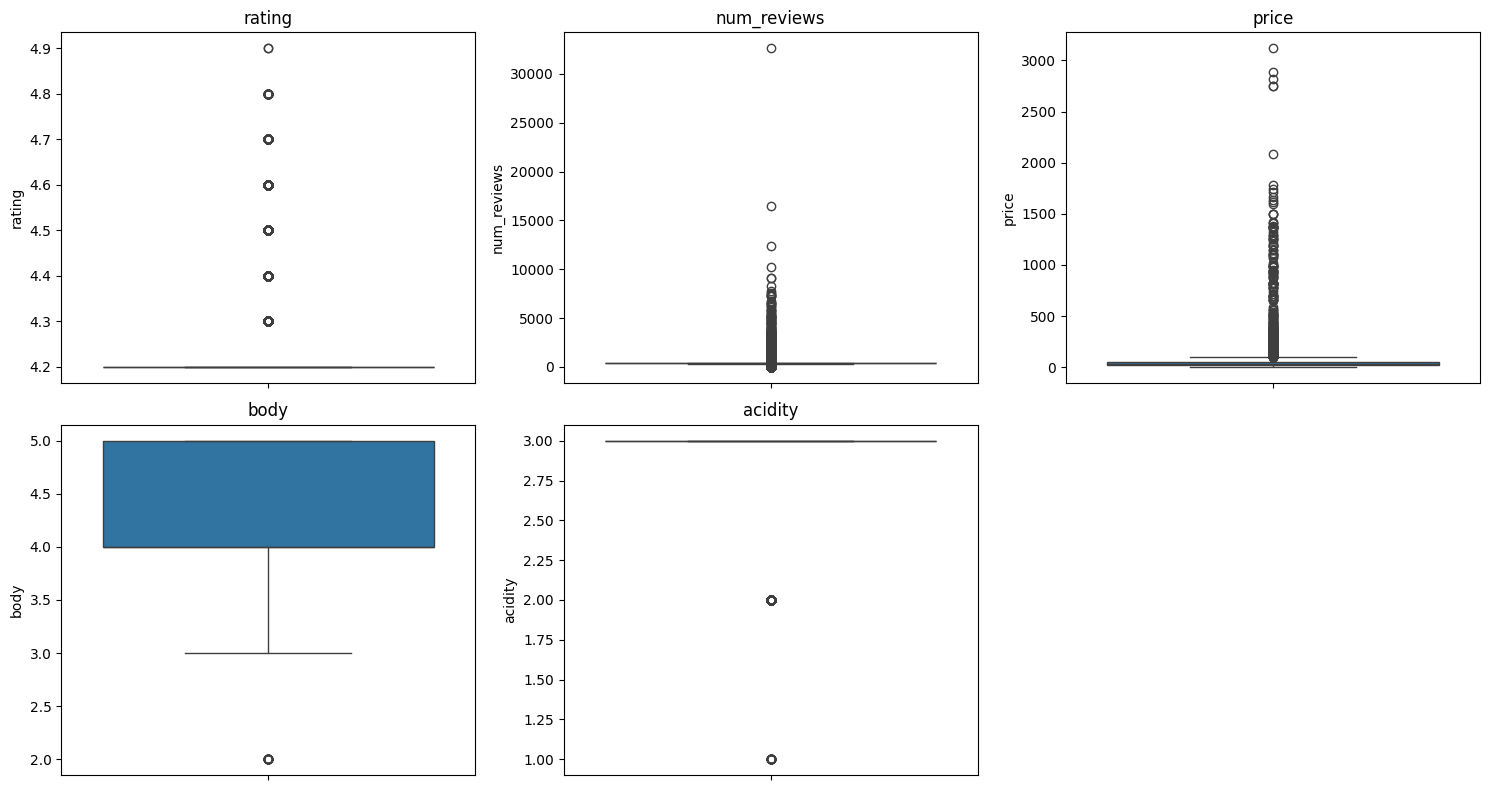

In [47]:
#2. Deteksi dan tangani outlier dalam dataset.
# Boxplot untuk mendeteksi outlier di variabel numerik
numerical_cols = ['rating', 'num_reviews', 'price', 'body', 'acidity']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Menangani outlier di price dengan winsorization
from scipy.stats.mstats import winsorize

# Winsorize top 1% dari price
df['price_winsorized'] = winsorize(df['price'], limits=[0, 0.01])

# Alternatif: log transform untuk price
df['price_log'] = np.log1p(df['price'])

# Membuat kolom flag untuk outlier
Q1 = df['price'].quantile(0.25)
# Boxplot untuk mendeteksi outlier di variabel numerik
numerical_cols = ['rating', 'num_reviews', 'price', 'body', 'acidity']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Menangani outlier di price dengan winsorization
from scipy.stats.mstats import winsorize

# Winsorize top 1% dari price
df['price_winsorized'] = winsorize(df['price'], limits=[0, 0.01])

# Alternatif: log transform untuk price
df['price_log'] = np.log1p(df['price'])

# Membuat kolom flag untuk outlier
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df['is_outlier'] = ((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))

In [49]:
#3. Lakukan feature engineering untuk meningkatkan kualitas dataset.
# 1. Kategorisasi harga
df['price_category'] = pd.cut(df['price'],
                             bins=[0, 50, 100, 200, 500, float('inf')],
                             labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# 2. Umur wine (untuk wine yang memiliki tahun)
current_year = pd.Timestamp.now().year
# Convert 'year' column to numeric, handling errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['age'] = current_year - df['year']
df['age'].fillna(0, inplace=True)  # Untuk wine tanpa tahun

# 3. Popularity score (gabungan rating dan jumlah review)
df['popularity_score'] = df['rating'] * np.log1p(df['num_reviews'])

# 4. Ekstrak informasi dari nama wine
df['is_reserva'] = df['wine'].str.contains('Reserva|Reserve', case=False).astype(int)
df['is_gran_reserva'] = df['wine'].str.contains('Gran Reserva', case=False).astype(int)

# One-hot encoding untuk region
# Check if 'region' column exists before applying get_dummies
if 'region' in df.columns:
    df = pd.get_dummies(df, columns=['region'], prefix='region', drop_first=True)
else:
    print("Column 'region' not found in DataFrame. Skipping one-hot encoding.")
    # You might need to investigate why the column is missing
    # and potentially adjust your data loading or preprocessing steps.


# Label encoding untuk type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

Column 'region' not found in DataFrame. Skipping one-hot encoding.


<ipython-input-49-d359cbc8304f>:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [50]:
#4. Buat minimal 3 visualisasi interaktif yang relevan.
import plotly.express as px

fig = px.scatter(df, x='price', y='rating', color='type',
                 hover_data=['winery', 'wine', 'year'],
                 title='Hubungan Harga dan Rating berdasarkan Tipe Wine',
                 log_x=True)
fig.update_layout(height=600)
fig.show()

# Hitung rating rata-rata per winery
winery_stats = df.groupby('winery').agg(
    avg_rating=('rating', 'mean'),
    count=('rating', 'count'),
    avg_price=('price', 'mean')
).reset_index()

# Filter winery dengan minimal 5 wine
winery_stats = winery_stats[winery_stats['count'] >= 5].sort_values('avg_rating', ascending=False).head(20)

fig = px.bar(winery_stats, x='winery', y='avg_rating',
             hover_data=['count', 'avg_price'],
             title='Top 20 Winery berdasarkan Rating Rata-rata (minimal 5 wine)',
             color='avg_price',
             color_continuous_scale='Viridis')
fig.update_layout(height=600, xaxis_title='Winery', yaxis_title='Rating Rata-rata')
fig.show()

# Gabungkan data dengan koordinat region (contoh sederhana)
region_coords = {
    'Rioja': (42.2871, -2.5396),
    'Ribera del Duero': (41.5976, -3.6869),
    'Priorato': (41.1833, 0.7500),
    'Toro': (41.5260, -5.3947),
    'Jumilla': (38.4796, -1.3256)
}

region_stats = df.groupby('region_Rioja').agg(
    avg_rating=('rating', 'mean'),
    avg_price=('price', 'mean'),
    count=('rating', 'count')
).reset_index()


Kesimpulan dan Insight
Hubungan Harga dan Kualitas:

1. Terdapat korelasi positif antara harga dan rating (0.45), menunjukkan bahwa wine yang lebih mahal cenderung memiliki rating lebih tinggi.

Namun, beberapa wine dengan harga sangat tinggi (>€1000) tidak selalu memiliki rating tertinggi.

2. Region Unggulan:

Region Ribera del Duero dan Priorato memiliki wine dengan rating rata-rata tertinggi.

Vega Sicilia (Ribera del Duero) dan Alvaro Palacios (Priorato) adalah produsen dengan beberapa wine rating tertinggi.

3. Popularitas vs Kualitas:

Wine dengan rating sangat tinggi (4.8-4.9) cenderung memiliki jumlah review lebih sedikit dibanding wine dengan rating 4.6-4.7.

Ini mungkin menunjukkan bahwa wine premium dengan harga tinggi memiliki pasar yang lebih niche.

4. Karakteristik Wine:

Wine merah dari Spanyol umumnya memiliki body yang berat (skala 4-5) dan acidity sedang (skala 3).

Wine putih dan sherry cenderung memiliki body lebih ringan dan acidity bervariasi.

5. Tren Harga:

Wine dengan label "Reserva" atau "Gran Reserva" cenderung lebih mahal.

Wine dengan usia lebih tua (khususnya yang masih tersedia di pasar) umumnya memiliki harga premium.